# MAC Examen final --- 20 de marzo de 2025

# Continuamos con la competencia

Nuestros ya conocidos *P. Caudatum* ($N_1$), y *P. Aurelia* ($N_2$) compiten por su supervivencia. Sabemos que la disponibilidad de nutrientes $R$ disueltos en el agua (como nitrógeno y fósforo) se relaciona con el crecimiento de las bacterias y, por lo tanto, indirectamente con el de los paramecios, cuyo alimento principal son las bacterias. Supongamos que $R$ viene dado por una tasa afectada por el consumo de los paramecios en la forma
 
#### $\frac{dR}{dt} = -(c_1 N_1 + c_2 N_2)RE$ 

donde $E$ es el coeficiente de eficiencia que gobierna cuánto del recurso puede ser utilizado y $c_i$ son los los factores de utilización de cada especie sobre $R$. 

A su vez, la capacidad de carga de cada especie, evidentemente relacionada con los recursos disponibles, presenta el comportamiento

#### $Ki = Ki + c_i R \text{.}$

Considere los siguientes

| Parámetros iniciales | Significado                                              |
|----------------------|----------------------------------------------------------|
| $r_1 = 0.6$             | Tasa de crecimiento intrínseca de *P. Caudatum* |
| $r_2 = 0.4 $             | Tasa de crecimiento intrínseca de *P. Aurelia* |
| $a = 2$               | Coeficiente de competencia de *P. Aurelia* sobre *P. Caudatum* |
| $b = 0.58$               | Coeficiente de competencia de *P. Caudatum* sobre *P. Aurelia* |
| $K_1 = 250$             | Capacidad de carga base para *P. Caudatum* |
| $K_2 = 170$             | Capacidad de carga base para *P. Aurelia* |
| $c_1 = 0.33$             | Tasa de consumo de recursos de *P. caudatum* |
| $c_2 = 0.2$             | Tasa de consumo de recursos de *P. aurelia* |
| $E   = 0.001$               | Coeficiente de eficiencia|

 1. Grafique el modelo convencional y el modelo propuesto junto con la evolución de $R$. Etiquete debidamente cada curva. Puede utilizar _Nivel de bacterias_ para $R$.
 2. Supongamos que se modifica la dinámica de $R$ de forma tal que se presenta un ingreso constante de bacterias $R_0$

#### $\frac{dR}{dt} = R_0 - (c_1 N_1 + c_2 N_2)RE \text{.}$

Si el factor $R_0$ es lo suficientemente grande, podría alterar la dinámica el comportamiento cualitativo de $R$. Determine un candidato a _valor umbral_ en donde la dinámica de $R$ cambia y explique si impacta en el comportamiendo de las especies y por qué.

### Comandos útiles

| Comando | Acción |
|---|---|
| `ax.set_xlabel()` | Establece la etiqueta del eje x en un gráfico de Matplotlib. |
| `ax.set_ylabel()` | Establece la etiqueta del eje y en un gráfico de Matplotlib. |
| `ax.legend()` | Añade una leyenda al gráfico de Matplotlib para identificar las diferentes líneas o elementos. |
| `ax.set_title()` | Establece el título del gráfico de Matplotlib. |
| `ax.set_xlim()` | Establece los límites del eje x en un gráfico de Matplotlib. |


# Caso base con R contante

150 0.0


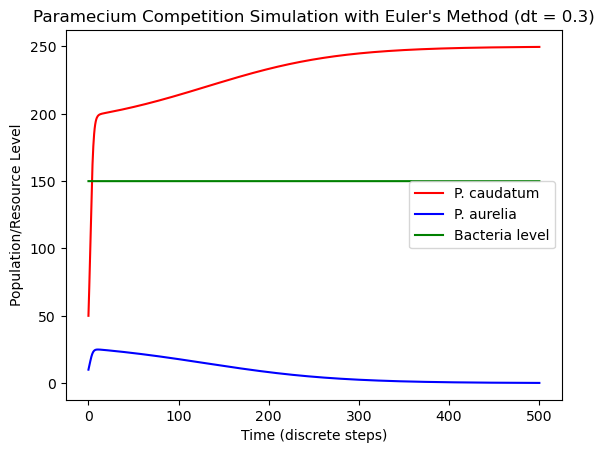

In [3]:
import matplotlib.pyplot as plt

# Model parameters
r1 = 0.6  # intrinsic growth rate of P. caudatum
r2 = 0.4  # intrinsic growth rate of P. aurelia
a = 2  # competition coefficient for P. aurelia on P. caudatum
b = 0.58  # competition coefficient for P. caudatum on P. aurelia
K1 = 250  # base carrying capacity for P. caudatum
K2 = 140  # base carrying capacity for P. aurelia
c1 = 0  # resource consumption rate of P. caudatum
c2 = 0  # resource consumption rate of P. aurelia

#c1= 0
#c2 = 0
# R_max = 200  # maximum bacteria level
efficiency_factor = 0.001

# Initial conditions
N1, N2, R = 50, 10, 150  # Initial populations and resource level (lists for storing values)
time_steps = [0]  # Empty list to store time steps

# Simulation time and time step
t_max = 500
dt = 0.3

# listas
N1_list, N2_list, R_list, K1_list, K2_list = [N1], [N2], [R], [K1], [K2]

# Simulation loop with Euler's method and storing values
print(R , -(c1*N1 + c2*N2) *R *efficiency_factor)
t = 0
while t < t_max:
    # Update state variables and time
    dN1_dt = r1 * N1 * (1 - (N1 + a * N2) / (K1 + c1 * R))
    dN2_dt = r2 * N2 * (1 - (N2 + b * N1) / (K2 + c2 * R))
    #dR_dt =  1 -(c1*N1 + c2*N2) *R *efficiency_factor
    dR_dt =  -(c1*N1 + c2*N2) *R *efficiency_factor
    
    N1 = N1 + dN1_dt * dt
    N2 = N2 + dN2_dt * dt
    R  = R + dR_dt * dt
    #print(t, f'{N1:>10.5e}', f'{N2:>10.5e}', f'{R:>10.5e}')
    N1_list.append(N1)
    N2_list.append(N2)
    R_list.append(R)
    K1_list.append(K1 + c1*R)
    K2_list.append(K2 + c2*R)
    t += dt
    time_steps.append(t)
    

#print(R, K1 + c1*R, K2 + c2*R)

# Create figure and axes
fig, ax = plt.subplots()

# Plot population dynamics and resource level changes
ax.plot(time_steps, N1_list, label="P. caudatum", color="red")
ax.plot(time_steps, N2_list, label="P. aurelia", color="blue")
ax.plot(time_steps, R_list, label="Bacteria level", color="green")
#ax.plot(time_steps, K1_list)
#ax.plot(time_steps, K2_list)
ax.set_xlabel("Time (discrete steps)")
ax.set_ylabel("Population/Resource Level")
ax.legend()
ax.set_title("Paramecium Competition Simulation with Euler's Method (dt = {})".format(dt))
#ax.set_xlim([1500, 3000])
# Show the plot

plt.show()


# Caso $\frac{dR}{dt} = -(c_1 N_1 + c_2 N_2)RE$

150 -2.775


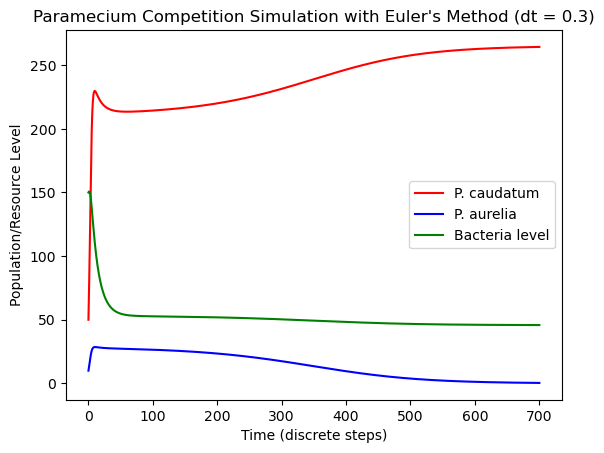

In [8]:
import matplotlib.pyplot as plt

# Model parameters
r1 = 0.6  # intrinsic growth rate of P. caudatum
r2 = 0.4  # intrinsic growth rate of P. aurelia
a = 2  # competition coefficient for P. aurelia on P. caudatum
b = 0.58  # competition coefficient for P. caudatum on P. aurelia
K1 = 250  # base carrying capacity for P. caudatum
K2 = 140  # base carrying capacity for P. aurelia
c1 = 0.33  # resource consumption rate of P. caudatum
c2 = 0.2  # resource consumption rate of P. aurelia

#c1= 0
#c2 = 0
# R_max = 200  # maximum bacteria level
efficiency_factor = 0.001

# Initial conditions
N1, N2, R = 50, 10, 150  # Initial populations and resource level (lists for storing values)
time_steps = [0]  # Empty list to store time steps

# Simulation time and time step
t_max = 700
dt = 0.3

# listas
N1_list, N2_list, R_list = [N1], [N2], [R]

# Simulation loop with Euler's method and storing values
print(R , -(c1*N1 + c2*N2) *R *efficiency_factor)
t = 0
while t < t_max:
    # Update state variables and time
    dN1_dt = r1 * N1 * (1 - (N1 + a * N2) / (K1 + c1 * R))
    dN2_dt = r2 * N2 * (1 - (N2 + b * N1) / (K2 + c2 * R))
    #dR_dt =  1 -(c1*N1 + c2*N2) *R *efficiency_factor
    dR_dt =  4 -(c1*N1 + c2*N2) *R *efficiency_factor
    
    N1 = N1 + dN1_dt * dt
    N2 = N2 + dN2_dt * dt
    R  = R + dR_dt * dt
    #print(K2 + c2 * R)
    N1_list.append(N1)
    N2_list.append(N2)
    R_list.append(R)
    t += dt
    time_steps.append(t)
    
    #print(R)

# Create figure and axes
fig, ax = plt.subplots()

# Plot population dynamics and resource level changes
ax.plot(time_steps, N1_list, label="P. caudatum", color="red")
ax.plot(time_steps, N2_list, label="P. aurelia", color="blue")
ax.plot(time_steps, R_list, label="Bacteria level", color="green")
ax.set_xlabel("Time (discrete steps)")
ax.set_ylabel("Population/Resource Level")
ax.legend()
ax.set_title("Paramecium Competition Simulation with Euler's Method (dt = {})".format(dt))
#ax.set_xlim([1500, 3000])
# Show the plot

plt.show()
